## Intro / Dependencies

In [1]:
import pandas as pd
import datetime as dt
import statsmodels.api as sm

In [2]:
file = "Analysis_test.xlsx"

In [3]:
df = pd.read_excel("Analysis_test.xlsx",usecols=["Date","Site Visits","Searches"]) 
df = pd.concat([df,pd.get_dummies(df["Date"].dt.weekday_name)],axis=1)
df.drop(columns=["Searches"],inplace=True)

In [4]:
df.head()

,Date,Site Visits,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2016-08-01,36468,0,1,0,0,0,0,0
1,2016-08-02,34307,0,0,0,0,0,1,0
2,2016-08-03,33930,0,0,0,0,0,0,1
3,2016-08-04,31783,0,0,0,0,1,0,0
4,2016-08-05,27253,1,0,0,0,0,0,0


In [5]:
dates = []
for n in range(1,len(df)+1):
    dates.append(n)

In [6]:
df["Date"] = dates
df

,Date,Site Visits,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,36468,0,1,0,0,0,0,0
1,2,34307,0,0,0,0,0,1,0
2,3,33930,0,0,0,0,0,0,1
3,4,31783,0,0,0,0,1,0,0
4,5,27253,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
70,71,28747,0,1,0,0,0,0,0
71,72,27318,0,0,0,0,0,1,0
72,73,30192,0,0,0,0,0,0,1
73,74,30598,0,0,0,0,1,0,0


## #1 Estimate the Visits for Oct 15

In [7]:
xcol = df.drop(columns = ["Site Visits"]).columns
ycol = "Site Visits"
X = df[xcol]
Y = df[ycol]
X.insert(0,"intercept",1)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary2().tables
print_model[0]
print_model[1]
coefs = print_model[1]["Coef."]
final_value= coefs["intercept"] + coefs["Saturday"] + coefs["Date"]*76
print(f"Estimated Visits for Oct 15 is {final_value}")

Estimated Visits for Oct 15 is 17465.799999993647


In [16]:
# #Method 2
# predictrow= X.tail(1)
# predictrow.at[74,'Date']=76
# predictrow.at[74,'Friday']=0
# predictrow.at[74,'Saturday']=1
# predictrow.reset_index
# model.predict(target) 

## Do a chart that shows the relationship between Site Visits and Searches

In [13]:
df1 = pd.read_excel("Analysis_test.xlsx",usecols=["Date","Site Visits","Searches"]) 
df1 = pd.concat([df1,pd.get_dummies(df1["Date"].dt.weekday_name)],axis=1)

## Visualization using Seaborn

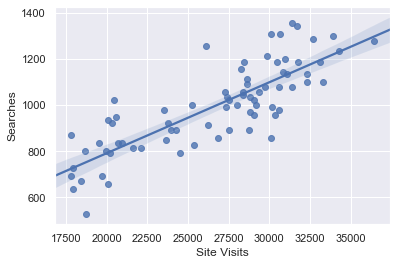

In [14]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x="Site Visits", y="Searches", data=df1)

## Visualization using Plotly (Image attached)

In [15]:
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
py.offline.init_notebook_mode(connected = True)

fig = px.scatter(df1, x="Searches", y="Site Visits", trendline="ols")
py.offline.plot(fig)
print("IMAGE is attached")

IMAGE is attached
